# Computer Vision

In [5]:
import cv2
input = cv2.imread('CV/cars.jpg')
while cv2.waitKey(100) != 27: # loop if not get ESC
    cv2.imshow("Hello World!", input)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [6]:
input

array([[[224, 216, 133],
        [224, 216, 133],
        [220, 212, 129],
        ...,
        [ 11,  34,   2],
        [ 11,  34,   2],
        [ 11,  34,   2]],

       [[229, 218, 136],
        [227, 216, 134],
        [225, 214, 132],
        ...,
        [ 11,  34,   2],
        [ 11,  34,   2],
        [ 11,  34,   2]],

       [[239, 224, 145],
        [236, 221, 142],
        [235, 220, 141],
        ...,
        [ 11,  34,   2],
        [ 11,  34,   2],
        [ 11,  34,   2]],

       ...,

       [[194, 179, 153],
        [203, 186, 160],
        [203, 183, 158],
        ...,
        [ 59,  56,  42],
        [ 59,  56,  42],
        [ 59,  56,  42]],

       [[193, 178, 152],
        [198, 183, 157],
        [197, 177, 152],
        ...,
        [ 59,  56,  42],
        [ 59,  56,  42],
        [ 59,  56,  42]],

       [[192, 177, 151],
        [195, 180, 154],
        [191, 171, 146],
        ...,
        [ 59,  56,  42],
        [ 59,  56,  42],
        [ 59,  56,  42]]

In [7]:
input.shape # Tensor yani 3 boyutlu bir matris

(675, 1200, 3)

In [8]:
from skimage import data
import matplotlib.pyplot as plt

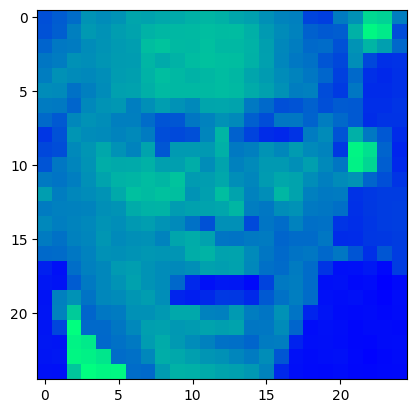

In [9]:
bush = data.lfw_subset()
bush = bush[0,:,:]
plt.imshow(bush, cmap='winter', interpolation='nearest');

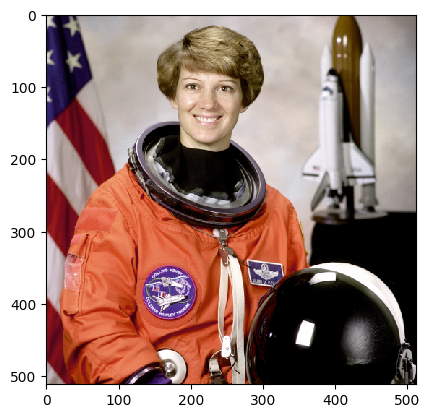

In [10]:
image = data.astronaut()
plt.imshow(image, cmap='RdBu', interpolation='nearest');

In [11]:
import cv2
image = cv2.imread('CV/input.jpg')


while cv2.waitKey(100) != 27:# loop if not get ESC
    cv2.imshow("Window_Name", image)


image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
while cv2.waitKey(100) != 27:# loop if not get ESC
    cv2.imshow("Window_Name", image_gray)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [12]:
import cv2
image = cv2.imread('CV/input.jpg', 0)
cv2.imshow('Grayscale', image)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [13]:
import cv2
image = cv2.imread('CV/input.jpg')
B,G,R = image[0,0]
print(B,G,R)

12 18 31


In [14]:
import cv2
image = cv2.imread('CV/input.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('Hue Channel', hsv_image[:,:,0])
cv2.imshow('Saturation Channel', hsv_image[:,:,1])
cv2.imshow('Value Channel', hsv_image[:,:,2])
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [15]:
import cv2
image = cv2.imread('CV/input.jpg')
B,G,R = cv2.split(image)
# cv2.imshow('RED', R)
# cv2.imshow('G', G)
# cv2.imshow('B', B)

merged = cv2.merge([B,G,R])
cv2.imshow('Merged', merged)

merged = cv2.merge([B+100,G+50,R])
cv2.imshow('Merged', merged)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Edge Detection

In [16]:
image = cv2.imread('CV/input.jpg',0)

height,width = image.shape[:2]

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)

cv2.imshow('Rotated Image',image)
cv2.waitKey(0)
cv2.imshow('Sobel X',sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y',sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('sobel_OR',sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey(0)

canny = cv2.Canny(image,50,120)
cv2.imshow('Canny',canny)
cv2.waitKey(0)


cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Live Sketch Using Webcam

In [17]:
import cv2
def sketch(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0)
    canny_edges = cv2.Canny(img_gray_blur,10,70)
    ret,mask = cv2.threshold(canny_edges,250,255,cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    cv2.imshow('Our live Sketcher',sketch(frame))
    if cv2.waitKey(1) == 13:  # Enter key to break
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

print('done')


2024-07-31 20:58:35.707 python[19724:296953] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


done


### Template Matching

In [18]:
import cv2
import numpy as np

image = cv2.imread("CV/WaldoBeach.jpg")

cv2.imshow("Where is Waldo",image)
cv2.waitKey(0)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

template = cv2.imread("CV/waldo.jpg",0)

result = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(result)

top_left = maxLoc
bottom_right =(top_left[0] + 50, top_left[1]+50)
cv2.rectangle(image,top_left,bottom_right,(0,0,255),5)

cv2.imshow("Where is Waldo",image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Flip Images and Data

In [19]:
import cv2

image = cv2.imread("CV/input.jpg")

flipped = cv2.flip(image,0)
cv2.imshow("Vertical Flip",flipped)

flipped = cv2.flip(image,1)
cv2.imshow("Horizontal Flip",flipped)

flipped = cv2.flip(image,2)
cv2.imshow("Bot Flip",flipped)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [20]:
import cv2

cap = cv2.VideoCapture("CV/airplanes.mp4")

while True:
    ret,frame= cap.read()
    if ret:
        cv2.imshow("Demo",frame)
    else:
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)  

-1

In [21]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame= cap.read()
    if ret:
        cv2.imshow("Bendeniz",frame)
    else:
        break
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [22]:
import cv2

cap = cv2.VideoCapture("CV/Cars.mp4")

while True:
    ret,frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        cv2.imshow('Demo', frame)
        cv2.imshow('Gray', gray)
        cv2.imshow('HSV', hsv)
    else:
        cap.release()
        break

    key = cv2.waitKey(100)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [23]:
import cv2

cap = cv2.VideoCapture("CV/Cars.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [24]:

import cv2
import numpy as np

cap = cv2.VideoCapture(0)

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur) # diff between 2 frames
    #diff = cv2.absdiff(frame1_blur,frame2_gray)

    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [25]:
import cv2
import numpy as np

cap = cv2.VideoCapture("CV/Cars.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur) # diff between 2 frames
    diff = cv2.absdiff(frame1_blur,frame2_gray)

    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [26]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)

    thresh = cv2.threshold(diff,20,255,cv2.THRESH_BINARY)[1]
    final = cv2.dilate(thresh,None,iterations=2)

    masked = cv2.bitwise_and(frame1,frame1,mask=thresh)
    white_pixels = np.sum(thresh) /255

    rows,cols = thresh.shape
    total= rows*cols
    if white_pixels > 0.01*total:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1,"Movement Detected - Hareket Var",(10,50),font,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Motion",frame1)
    frame1=frame2
    ret,frame2 = cap.read()
    if not ret:
        break
    key = cv2.waitKey(10)
    if key == 27 or key == ord("q"):
        break
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [27]:
import cv2
import numpy as np

cap = cv2.VideoCapture("CV/Airplanes.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)

    thresh = cv2.threshold(diff,10,255,cv2.THRESH_BINARY)[1]
    final = cv2.dilate(thresh,None,iterations=2)

    masked = cv2.bitwise_and(frame1,frame1,mask=thresh)
    white_pixels = np.sum(thresh) /255

    rows,cols = thresh.shape
    total= rows*cols
    if white_pixels > 0.01*total:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1,"Movement Detected - Hareket Var",(10,50),font,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Motion",frame1)
    frame1=frame2
    ret,frame2 = cap.read()
    if not ret:
        break
    key = cv2.waitKey(10)
    if key == 27 or key == ord("q"):
        break
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [28]:
import cv2
import numpy as np


# Read image
image = cv2.imread("CV/Sunflowers.jpg")

# Set up the detector with default par ameters.
detector =cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)
print(len(keypoints))

# Show keypoints
cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

255


-1

In [32]:
import cv2
import numpy as np

# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('CV/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('CV/Me.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)

<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/kf/80hpl2kn5w15d33xbcc7r31r0000gn/T/ipykernel_19724/585641780.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


-1

In [33]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('CV/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('CV/haarcascade_eye.xml')

img = cv2.imread('CV/Me.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/kf/80hpl2kn5w15d33xbcc7r31r0000gn/T/ipykernel_19724/4247355266.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


-1

In [2]:
import cv2
import numpy as np
from time import sleep
face_classifier = cv2.CascadeClassifier('CV/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('CV/haarcascade_eye.xml')
def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        sleep(.05)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    img = cv2.flip(img,1)
    return img
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/kf/80hpl2kn5w15d33xbcc7r31r0000gn/T/ipykernel_21728/1536400722.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
2024-07-31 21:34:51.902 python[21728:339686] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


-1

In [3]:
face_classifier = cv2.CascadeClassifier("CV/haarcascade_frontalface_default.xml")
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face
cap = cv2.VideoCapture(0)

count = 0
while True:
    ret,frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path = './face/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow("Face Cropper",face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count == 100:
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
print('Collecting Samples Complete')

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/kf/80hpl2kn5w15d33xbcc7r31r0000gn/T/ipykernel_21728/261132608.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found


In [6]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join

data_path = './face/'
onlyfiles =[f for f in listdir(data_path) if isfile(join(data_path,f))]

Training_Data,Labels = [],[]

for i,files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images,dtype = np.uint8))
    Labels.append(i)

Labels = np.asarray(Labels,dtype = np.int32)
model = cv2.face.LBPHFaceRecognizer_create()

model.train(np.asarray(Training_Data),np.asarray(Labels))
print("Model Trained Succesfully")

Model Trained Succesfully


In [5]:
face_classifier = cv2.CascadeClassifier("CV/haarcascade_frontalface_default.xml")
def face_extractor(img, size = 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return img,[]
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    return img,roi
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    image,face = face_extractor(frame)
    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        if results[1]<500:
            confidence = int(100 * (1-(results[1])/400))
            display_string = str(confidence) + '% sure this guy is myself'
        cv2.putText(image,display_string,(100,120),cv2.FONT_HERSHEY_COMPLEX,1,(255,120,150),2)
        if confidence > 75:
            cv2.putText(image,"Unlocked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Face Recognition",image)
        else:
            cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            cv2.imshow("Face Recognition",image)
    except:
        cv2.putText(image,"No Face Found" ,(220,120),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Face Recognition",image)
    if cv2.waitKey(1) == 13:
        cap.release()
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/kf/80hpl2kn5w15d33xbcc7r31r0000gn/T/ipykernel_21728/3498660011.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


-1